<a href="https://colab.research.google.com/github/stevenlu870120/Data_Glacier_W2/blob/main/G2M_Cab_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# G2M Cab Case Study EDA

## Context

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

## Hypothesis to investigate

* How does the number of people taking cabs change over year
* What is the trend of cab profit over year
* What is the relationship between cost and profit
* Which cab is better at making profit
* Which city has a higher profit rate

In [53]:
# pip install -U pandas-profiling

In [54]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Data

In [55]:
# Read data
cab_data = pd.read_csv('/content/drive/My Drive/G2M_Data/Cab_Data.csv')
city = pd.read_csv('/content/drive/My Drive/G2M_Data/City.csv')
customer_id = pd.read_csv('/content/drive/My Drive/G2M_Data/Customer_ID.csv')
transaction_id = pd.read_csv('/content/drive/My Drive/G2M_Data/Transaction_ID.csv')

## Data Cleaning

### Data Types and Missing Values

In [56]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


In [57]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [58]:
city['Population'] = city['Population'].str.replace(',', '')
city['Users'] = city['Users'].str.replace(',', '')

In [59]:
city = city.astype({
    'Population': 'float',
    'Users': 'float'
})

In [60]:
city = city.astype({
    'Population': 'Int64',
    'Users': 'Int64'
})

In [61]:
customer_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [62]:
transaction_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [63]:
# join all data to one df 
final_df = (
    cab_data.merge(city, how = 'left', left_on = 'City', right_on = 'City')
    .merge(transaction_id, how = 'left', left_on = 'Transaction ID', right_on = 'Transaction ID')
    .merge(customer_id, how = 'left', left_on = 'Customer ID', right_on = 'Customer ID')
)

final_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,1/8/16,Pink Cab,ATLANTA GA,30.45,370.95,313.635,814885,24701,29290,Card,Male,28,10813
1,10000012,1/6/16,Pink Cab,ATLANTA GA,28.62,358.52,334.854,814885,24701,27703,Card,Male,27,9237
2,10000013,1/2/16,Pink Cab,ATLANTA GA,9.04,125.20,97.632,814885,24701,28712,Cash,Male,53,11242
3,10000014,1/7/16,Pink Cab,ATLANTA GA,33.17,377.40,351.602,814885,24701,28020,Cash,Male,23,23327
4,10000015,1/3/16,Pink Cab,ATLANTA GA,8.73,114.62,97.776,814885,24701,27182,Card,Male,33,8536


In [64]:
# Convert column data types

final_df = final_df.astype({
    'Date of Travel': 'datetime64[ns]'
})

In [65]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Population          359392 non-null  Int64         
 8   Users               359392 non-null  Int64         
 9   Customer ID         359392 non-null  int64         
 10  Payment_Mode        359392 non-null  object        
 11  Gender              359392 non-null  object        
 12  Age                 359392 non-null  int64         
 13  Income (USD/Month)  359392 no

There are no missing values in each of the individual data sets. However, some of the transaction IDs are missing in the cab data set. I kept all the transaction IDs in the final data frame, so there will be some missing values in it.

### Duplicate Values

In [66]:
cab_data['Transaction ID'].duplicated().sum()

0

In [67]:
transaction_id['Transaction ID'].duplicated().sum()

0

In [68]:
customer_id['Customer ID'].duplicated().sum()

0

In [69]:
city['City'].duplicated().sum()

0

There are no duplicated values in all 4 data sets

## Univariate Analysis


### Distribution in Table

In [70]:
final_df.describe(include='all').round(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
count,359392.00,359392,359392,359392,359392.00,359392.00,359392.00,359392.00,359392.00,359392.00,359392,359392,359392.00,359392.00
unique,NaN,1095,2,19,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN
top,NaN,2018-01-05 00:00:00,Yellow Cab,NEW YORK NY,NaN,NaN,NaN,NaN,NaN,NaN,Card,Male,NaN,NaN
freq,NaN,2022,274681,99885,NaN,NaN,NaN,NaN,NaN,NaN,215504,205912,NaN,NaN
first,NaN,2016-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2018-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10220761.19,NaN,NaN,NaN,22.57,423.44,286.19,3132198.04,158365.58,19191.65,NaN,NaN,35.34,15048.82
std,126805.80,NaN,NaN,NaN,12.23,274.38,157.99,3315194.39,100850.05,21012.41,NaN,NaN,12.59,7969.41
min,10000011.00,NaN,NaN,NaN,1.90,15.60,19.00,248968.00,3643.00,1.00,NaN,NaN,18.00,2000.00
25%,10110809.75,NaN,NaN,NaN,12.00,206.44,151.20,671238.00,80021.00,2705.00,NaN,NaN,25.00,8424.00


Interesting Facts from Attribute Distributions:


*   The rate of Price Charged increased is greater than the rate of cost increased 
*   Mean of Priced Charged is quite different than its median





## Categorical Variable Plots

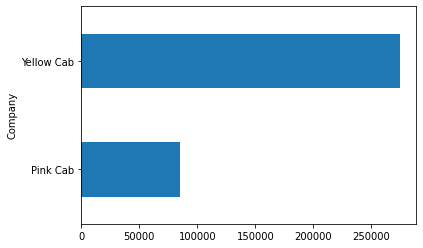

In [71]:
final_df.groupby('Company')['Transaction ID'].nunique().sort_values().plot.barh()

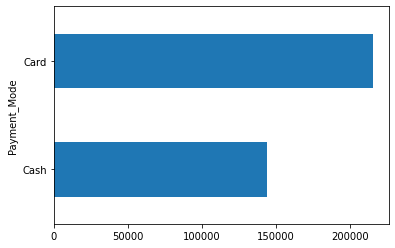

In [72]:
final_df.groupby('Payment_Mode')['Transaction ID'].nunique().sort_values().plot.barh()

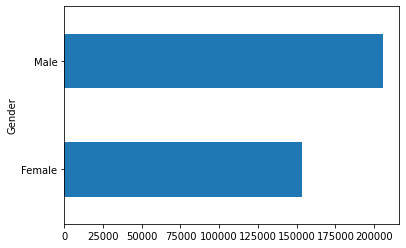

In [73]:
final_df.groupby('Gender')['Transaction ID'].nunique().sort_values().plot.barh()

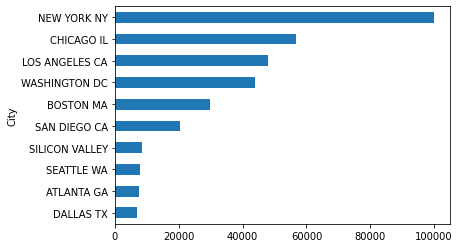

In [74]:
final_df.groupby('City')['Transaction ID'].nunique().sort_values().tail(10).plot.barh()

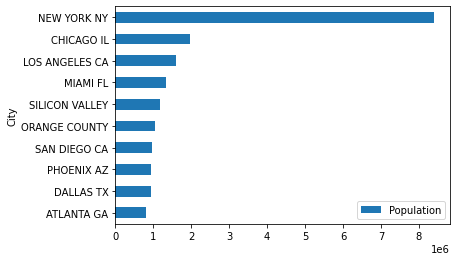

In [75]:
city.sort_values('Population').tail(10).plot.barh(x = 'City', y = 'Population')

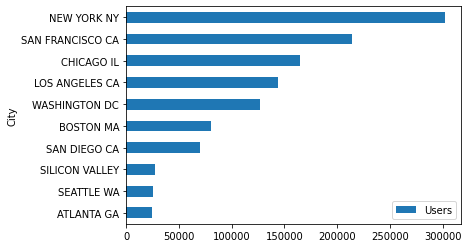

In [76]:
city.sort_values('Users').tail(10).plot.barh(x = 'City', y = 'Users')

## Continuous Variable Plots

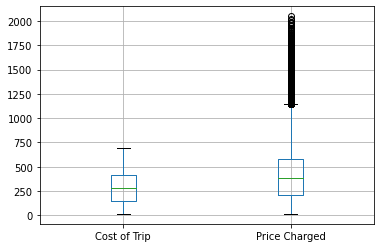

In [77]:
final_df.boxplot(column = ['Cost of Trip', 'Price Charged'])

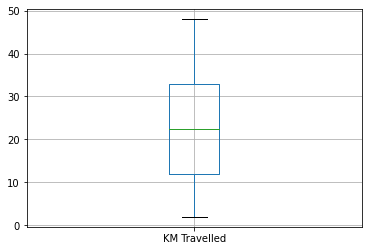

In [78]:
final_df.boxplot(column = 'KM Travelled')

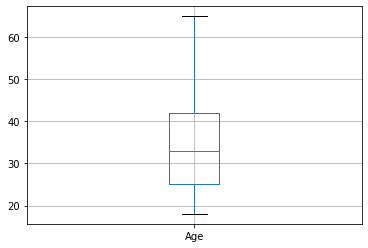

In [79]:
final_df.boxplot(column = 'Age')

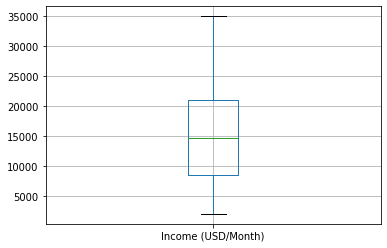

In [80]:
final_df.boxplot(column = 'Income (USD/Month)')

# Bivariate Analysis


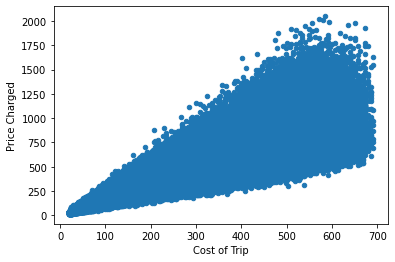

In [81]:
final_df.plot.scatter(x='Cost of Trip', y='Price Charged')
plt.show()

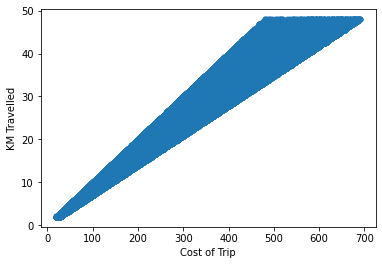

In [82]:
final_df.plot.scatter(x='Cost of Trip', y='KM Travelled')
plt.show()

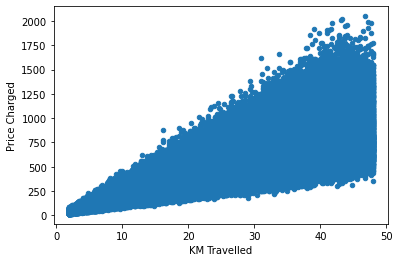

In [83]:
final_df.plot.scatter(x='KM Travelled', y='Price Charged')
plt.show()

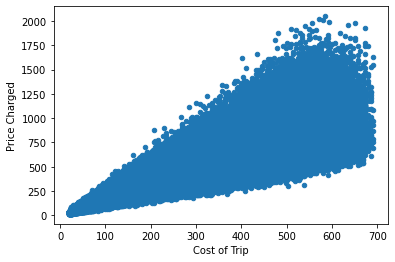

In [84]:
final_df.plot.scatter(x='Cost of Trip', y='Price Charged')
plt.show()

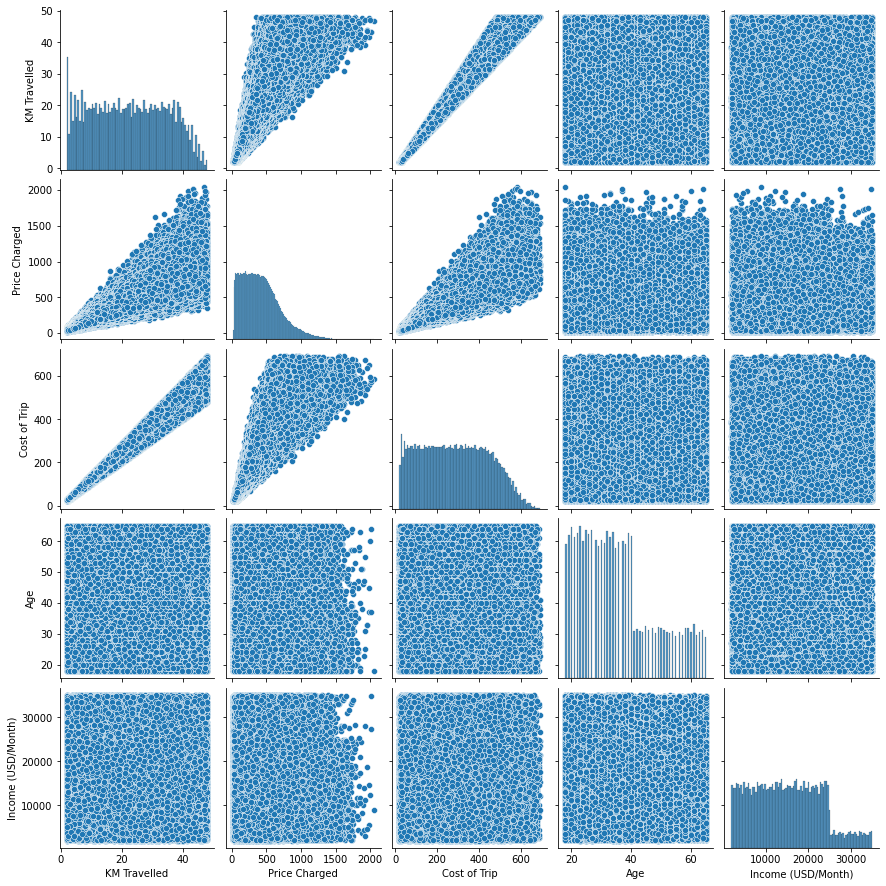

In [85]:
sns.pairplot(final_df[['KM Travelled', 'Price Charged', 'Cost of Trip', 'Age', 'Income (USD/Month)']])

## Profit Analysis

In [86]:
# Add Profit column into the data frame

final_df['Profit'] = final_df['Price Charged'] - final_df['Cost of Trip']

# Add year
final_df['Year'] = final_df['Date of Travel'].dt.year

In [87]:
final_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Profit,Year
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,814885,24701,29290,Card,Male,28,10813,57.315,2016
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,814885,24701,27703,Card,Male,27,9237,23.666,2016
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,814885,24701,28712,Cash,Male,53,11242,27.568,2016
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,814885,24701,28020,Cash,Male,23,23327,25.798,2016
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,814885,24701,27182,Card,Male,33,8536,16.844,2016


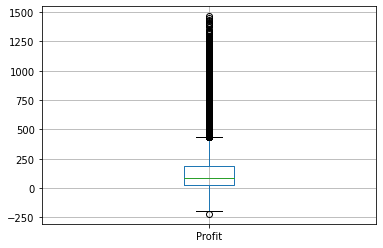

In [88]:
final_df.boxplot(column = 'Profit')

## Hypothesis Investigation

### How does the number of people taking cabs change over year

In [89]:
monthly_users = (
    final_df
    .groupby('Date of Travel')
    .agg(
        users = ('Transaction ID', 'nunique')
    )
    .resample('M')
    .sum()
)

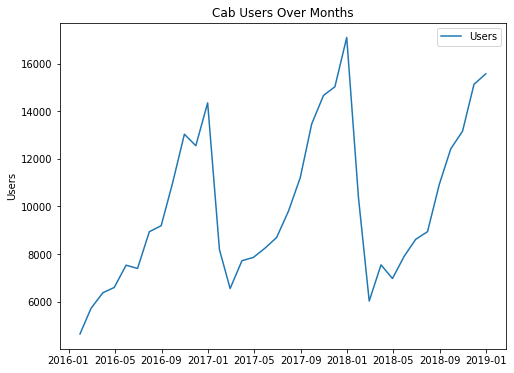

In [90]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(monthly_users.index, monthly_users['users'], label = 'Users')

ax.set_title('Cab Users Over Months')
ax.set_ylabel('Users')

ax.legend()

plt.show()

The number of cab users increased from 2016 to 2017, but decreased from 2017 to 2018. Also, we can see that there is a seasonality trend for cab users across one year. The peak of cab users in a year lies in December and January

### What is the trend of cab profit over year

In [91]:
cab_profit = final_df[['Year', 'Company', 'Profit']].groupby(['Year', 'Company']).sum().reset_index()
cab_profit = cab_profit.pivot(index='Year', columns='Company', values='Profit')

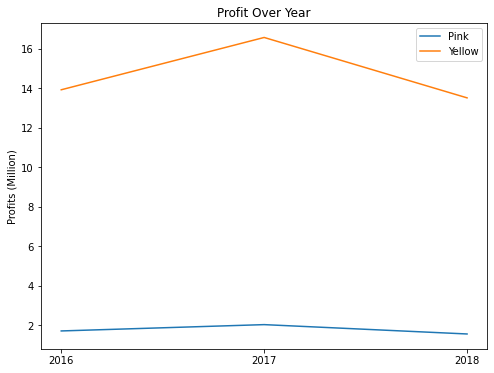

In [92]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(cab_profit.index, cab_profit['Pink Cab'] / 1000000, label = 'Pink')
ax.plot(cab_profit.index, cab_profit['Yellow Cab'] / 1000000, label = 'Yellow')

ax.set_title('Profit Over Year')
ax.set_ylabel('Profits (Million)')
ax.set_xticks([2016, 2017, 2018])

ax.legend()

plt.show()

Both Pink cab and Yellow cab had the highest profit in 2017, and we can see that Yellow cab made significantly more profit than the Pink cab. The reasons could be that they are better at generating profit or there were more Yellow cabs than Pink cabs

### What is the relationship between cost and profit

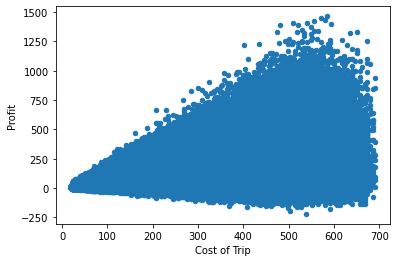

In [93]:
final_df.plot.scatter(x='Cost of Trip', y='Profit')
plt.show()

In general, as cost increases, profit also increases. However, as cost gets higher, the variance of profit also increases, making the prediction of profit based on cost harder.

### Which cab company is better at making profit

In [94]:
profit_rate_pink = (
    final_df.loc[final_df['Company'] == 'Pink Cab']
    .groupby('Year')
    .agg(Profit = ('Profit', 'sum'), Users = ('Transaction ID', 'nunique'))
)

profit_rate_pink['Profit/User'] = profit_rate_pink['Profit'] / profit_rate_pink['Users']

In [95]:
profit_rate_yellow = (
    final_df.loc[final_df['Company'] == 'Yellow Cab']
    .groupby('Year')
    .agg(Profit = ('Profit', 'sum'), Users = ('Transaction ID', 'nunique'))
)

profit_rate_yellow['Profit/User'] = profit_rate_yellow['Profit'] / profit_rate_yellow['Users']

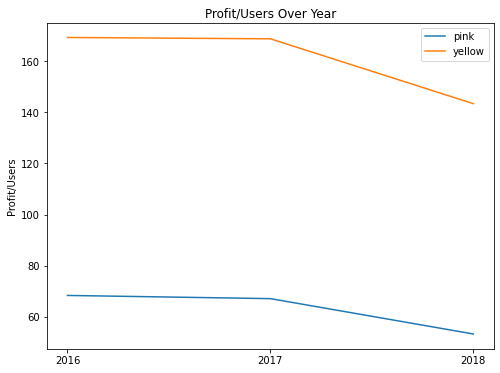

In [96]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(profit_rate_pink.index, profit_rate_pink['Profit/User'], label = 'pink')
ax.plot(profit_rate_yellow.index, profit_rate_yellow['Profit/User'], label = 'yellow')

ax.set_title('Profit/Users Over Year')
ax.set_ylabel('Profit/Users')
ax.set_xticks([2016, 2017, 2018])

ax.legend()

plt.show()

We can see that on average for each user, Yellow cab was able to generate profit of 140 - 170 dollars while Pink cab were only able to generate 50 - 70 dollars of profit.

### Which city has a higher profit rate

In [97]:
city_profit_rate = (
    final_df
    .groupby('City')
    .agg(Profit = ('Profit', 'sum'), Customers = ('Transaction ID', 'nunique'))
)

city_profit_rate['Profit/Customer'] = city_profit_rate['Profit'] / city_profit_rate['Customers']

city_profit_rate = city_profit_rate.sort_values('Profit/Customer', ascending = False).iloc[:10]

city_profit_rate = city_profit_rate[::-1]

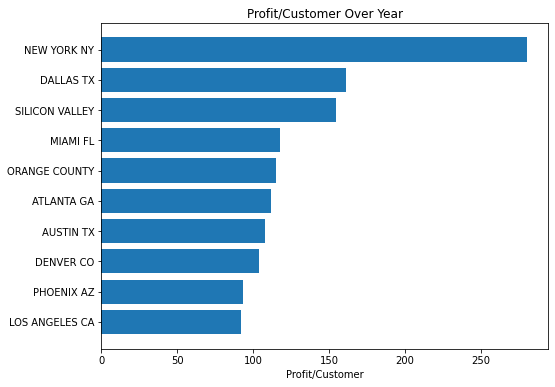

In [98]:
fig, ax = plt.subplots(figsize=(8,6))

ax.barh(city_profit_rate.index, city_profit_rate['Profit/Customer'])

ax.set_title('Profit/Customer Over Year')
ax.set_xlabel('Profit/Customer')

plt.show()

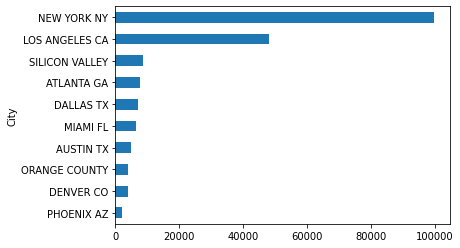

In [99]:
final_df[final_df['City'].isin(['LOS ANGELES CA', 'PHOENIX AZ', 'DENVER CO', 'AUSTIN TX', 'ATLANTA GA',
       'ORANGE COUNTY', 'MIAMI FL', 'SILICON VALLEY', 'DALLAS TX',
       'NEW YORK NY'])].groupby('City')['Transaction ID'].nunique().sort_values().tail(10).plot.barh()

plt.show()

We can see that on average cabs make more profit in New York, followed by Dallas and Silicon Valley. Among the top 10 profit/customer cities, New York has the highest customer count, followed by LA and were significantly more than other cities